In [58]:
#For working with arrays
import numpy as np

#for visualization
import matplotlib.pyplot as plt

#for image reading
import cv2
import os

#for image processing
import PIL

#for CNN model building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Flatten


In [59]:
data_dir = './archive2/training'

In [60]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('archive2/training')

In [61]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('archive2/training/glioma_tumor/gg (1).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (10).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (100).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (101).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (102).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (103).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (104).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (105).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (106).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (107).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (108).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (109).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (11).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (110).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (111).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (112).jpg'),
 WindowsPath('archive2/train

In [62]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

2870

In [63]:
gg = list(data_dir.glob('glioma_tumor/*'))
gg[:5]

[WindowsPath('archive2/training/glioma_tumor/gg (1).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (10).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (100).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (101).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (102).jpg')]

In [64]:
no = list(data_dir.glob('no_tumor/*'))
no[:5]

[WindowsPath('archive2/training/no_tumor/no (1).jpg'),
 WindowsPath('archive2/training/no_tumor/no (10).jpg'),
 WindowsPath('archive2/training/no_tumor/no (100).jpg'),
 WindowsPath('archive2/training/no_tumor/no (101).jpg'),
 WindowsPath('archive2/training/no_tumor/no (102).jpg')]

In [65]:
p = list(data_dir.glob('pituitary_tumor/*'))
p[:5]

[WindowsPath('archive2/training/pituitary_tumor/p (1).jpg'),
 WindowsPath('archive2/training/pituitary_tumor/p (10).jpg'),
 WindowsPath('archive2/training/pituitary_tumor/p (100).jpg'),
 WindowsPath('archive2/training/pituitary_tumor/p (101).jpg'),
 WindowsPath('archive2/training/pituitary_tumor/p (102).jpg')]

In [66]:
m = list(data_dir.glob('meningioma_tumor/*'))
m[:5]

[WindowsPath('archive2/training/meningioma_tumor/m (10).jpg'),
 WindowsPath('archive2/training/meningioma_tumor/m (100).jpg'),
 WindowsPath('archive2/training/meningioma_tumor/m (101).jpg'),
 WindowsPath('archive2/training/meningioma_tumor/m (102).jpg'),
 WindowsPath('archive2/training/meningioma_tumor/m (103).jpg')]

In [67]:
BT_images_dict = {
    'gg': list(data_dir.glob('glioma_tumor/*')),
    'm': list(data_dir.glob('meningioma_tumor/*')),
    'p': list(data_dir.glob('pituitary_tumor/*')),
    'no': list(data_dir.glob('no_tumor/*')),
}

In [68]:
BT_labels_dict = {
    'gg': 0,
    'm': 1,
    'p': 3,
    'no':2 ,
    
}

In [69]:
BT_images_dict['gg'][:5]

[WindowsPath('archive2/training/glioma_tumor/gg (1).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (10).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (100).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (101).jpg'),
 WindowsPath('archive2/training/glioma_tumor/gg (102).jpg')]

In [70]:
img = cv2.imread(str(BT_images_dict['gg'][0]))
img.shape              #cv2 convert image into 3D array

(512, 512, 3)

In [71]:
img.shape

(512, 512, 3)

In [72]:
cv2.resize(img,(150,150)).shape


(150, 150, 3)

In [73]:
X,y = [],[]

for BT_Status,images in BT_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(150,150))
        X.append(resized_img)
        y.append(BT_labels_dict[BT_Status])

In [74]:
X = np.array(X)
y = np.array(y)

In [75]:
X_train_scaled = X / 255

In [76]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"), 
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [77]:
num_classes = 4

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
              
model.fit(X_train_scaled, y, epochs=50)

Epoch 1/50
90/90 [==============================] - 16s 162ms/step - loss: 1.1262 - accuracy: 0.5007
Epoch 2/50
90/90 [==============================] - 14s 161ms/step - loss: 0.8327 - accuracy: 0.6509
Epoch 3/50
90/90 [==============================] - 14s 161ms/step - loss: 0.6863 - accuracy: 0.7084
Epoch 4/50
90/90 [==============================] - 15s 161ms/step - loss: 0.6263 - accuracy: 0.7352
Epoch 5/50
90/90 [==============================] - 15s 162ms/step - loss: 0.5918 - accuracy: 0.7551
Epoch 6/50
90/90 [==============================] - 15s 162ms/step - loss: 0.5436 - accuracy: 0.7746
Epoch 7/50
90/90 [==============================] - 14s 160ms/step - loss: 0.4825 - accuracy: 0.8084
Epoch 8/50
90/90 [==============================] - 14s 161ms/step - loss: 0.4603 - accuracy: 0.8091
Epoch 9/50
90/90 [==============================] - 15s 164ms/step - loss: 0.4096 - accuracy: 0.8265
Epoch 10/50
90/90 [==============================] - 14s 158ms/step - loss: 0.3989 - accura

In [78]:
data_dir2 = './archive2/testing'
data_dir2 = pathlib.Path(data_dir2)
data_dir2

WindowsPath('archive2/testing')

In [79]:
BT_images_dict1 = {
    'gg': list(data_dir2.glob('glioma_tumor/*')),
    'm': list(data_dir2.glob('meningioma_tumor/*')),
    'p': list(data_dir2.glob('pituitary_tumor/*')),
    'no': list(data_dir2.glob('no_tumor/*')),
}

In [80]:
BT_labels_dict1 = {
    'gg': 0,
    'm': 1,
    'p': 3,
    'no':2 ,
    
}

In [81]:
b,c = [],[]

for BT_Status,images in BT_images_dict1.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(150,150))
        b.append(resized_img)
        c.append(BT_labels_dict1[BT_Status])

In [82]:
len(b)

394

In [83]:
B = np.array(b)
C = np.array(c)

In [84]:
B_test_scaled = B / 255

In [85]:
model.evaluate(B_test_scaled,C)

13/13 [==============================] - 1s 34ms/step - loss: 5.0397 - accuracy: 0.6878


[5.039721965789795, 0.6878172755241394]

# VGG16


In [86]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

In [87]:
IMAGE_SIZE = [150,150]

In [88]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [89]:
for layer in vgg16.layers:
    layer.trainable = False

In [90]:
x = Flatten()(vgg16.output)

In [91]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [92]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [93]:
tf.config.run_functions_eagerly(True)

In [94]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y, num_classes=4)
y_test = to_categorical(C, num_classes=4)

In [95]:
r = model.fit(X_train_scaled, y_train,validation_data=(B_test_scaled, y_test),epochs=50)

Epoch 1/50


c:\Users\12896\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


90/90 [==============================] - 418s 5s/step - loss: 0.6834 - accuracy: 0.7300 - val_loss: 1.5205 - val_accuracy: 0.5406
Epoch 2/50
90/90 [==============================] - 444s 5s/step - loss: 0.3964 - accuracy: 0.8540 - val_loss: 1.3534 - val_accuracy: 0.6497
Epoch 3/50
90/90 [==============================] - 430s 5s/step - loss: 0.2895 - accuracy: 0.9017 - val_loss: 1.5564 - val_accuracy: 0.6853
Epoch 4/50
90/90 [==============================] - 436s 5s/step - loss: 0.2429 - accuracy: 0.9220 - val_loss: 1.4192 - val_accuracy: 0.7005
Epoch 5/50
90/90 [==============================] - 436s 5s/step - loss: 0.2091 - accuracy: 0.9310 - val_loss: 1.5241 - val_accuracy: 0.7284
Epoch 6/50
90/90 [==============================] - 438s 5s/step - loss: 0.1922 - accuracy: 0.9415 - val_loss: 1.8367 - val_accuracy: 0.7132
Epoch 7/50
90/90 [==============================] - 440s 5s/step - loss: 0.1718 - accuracy: 0.9484 - val_loss: 1.7910 - val_accuracy: 0.7411
Epoch 8/50
90/90 [======

In [96]:
model.predict(X_train_scaled)

90/90 [==============================] - 89s 980ms/step


array([[9.9994683e-01, 2.2060216e-05, 7.8463327e-06, 2.3209217e-05],
       [9.4750804e-01, 4.1820109e-02, 5.2930042e-03, 5.3787827e-03],
       [9.9629068e-01, 3.6561484e-03, 2.6226752e-07, 5.2922587e-05],
       ...,
       [4.5088162e-11, 4.8073114e-05, 9.9995196e-01, 6.6983576e-12],
       [1.0540325e-09, 8.2293869e-04, 9.9917668e-01, 3.1041728e-07],
       [4.2347068e-07, 5.1327410e-05, 9.9980956e-01, 1.3863530e-04]],
      dtype=float32)

#RESNET


In [97]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [98]:
IMAGE_SIZE = [150,150]

In [99]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [100]:
for layer in resnet.layers:
    layer.trainable = False

In [101]:
x = Flatten()(resnet.output)

In [102]:
prediction = Dense(4, activation='softmax')(x)

In [103]:
model = Model(inputs=resnet.input, outputs=prediction)

In [104]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [105]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [107]:
r = model.fit(X_train_scaled, y_train,validation_data=(B_test_scaled, y_test),epochs=50)

Epoch 1/50
90/90 [==============================] - 264s 3s/step - loss: 0.8846 - accuracy: 0.6314 - val_loss: 2.5346 - val_accuracy: 0.3959
Epoch 2/50
90/90 [==============================] - 266s 3s/step - loss: 0.7521 - accuracy: 0.6930 - val_loss: 2.6546 - val_accuracy: 0.3807
Epoch 3/50
90/90 [==============================] - 264s 3s/step - loss: 0.7324 - accuracy: 0.7028 - val_loss: 2.8694 - val_accuracy: 0.3858
Epoch 4/50
90/90 [==============================] - 264s 3s/step - loss: 0.6723 - accuracy: 0.7258 - val_loss: 2.4747 - val_accuracy: 0.4594
Epoch 5/50
90/90 [==============================] - 264s 3s/step - loss: 0.6335 - accuracy: 0.7307 - val_loss: 2.6532 - val_accuracy: 0.4848
Epoch 6/50
90/90 [==============================] - 264s 3s/step - loss: 0.6124 - accuracy: 0.7509 - val_loss: 2.4032 - val_accuracy: 0.4695
Epoch 7/50
90/90 [==============================] - 264s 3s/step - loss: 0.5592 - accuracy: 0.7767 - val_loss: 3.1150 - val_accuracy: 0.4518
Epoch 8/50
90

In [108]:
import pickle
#Saving model 
model.save('resnet')

INFO:tensorflow:Assets written to: resnet\assets


INFO:tensorflow:Assets written to: resnet\assets


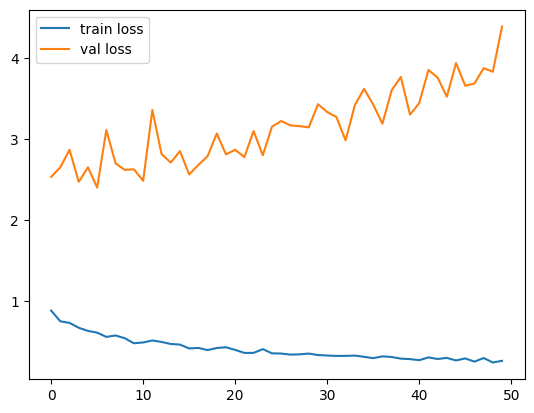

<Figure size 640x480 with 0 Axes>

In [109]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

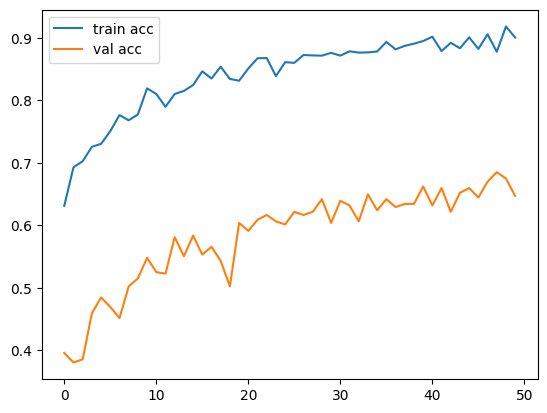

<Figure size 640x480 with 0 Axes>

In [110]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')